## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
# install_all_packages()
load_library_packages()

## Clustering - Kmodes Silhoette

In [2]:
df_during_barriers_dist <- distinct(df_during_barriers)
nrow(df_during_barriers_dist)

[1] 33

### Silhoette 
<hr />

In [3]:
df_matrix <- data.matrix(df_during_barriers_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_barriers_dist) - similarity_matrix
head(dissimilarity_matrix)

0,1,2,1,1,2,2,2,2,3,...,2,3,4,4,1,4,3,3,3,5
1,0,3,2,2,3,3,1,3,2,...,3,4,3,3,2,5,4,2,2,4
2,3,0,3,3,2,2,4,4,3,...,2,3,2,4,1,2,3,5,3,3
1,2,3,0,2,1,1,1,1,2,...,3,2,3,3,2,3,4,2,4,4
1,2,3,2,0,3,3,3,1,4,...,3,4,5,5,2,3,2,2,4,4
2,3,2,1,3,0,2,2,2,1,...,2,1,2,2,1,2,3,3,3,3


#### Scanning parameters


In [4]:
nseed <- 1000
nk <- nrow(distinct(df_during_barriers))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     silhouette_scs <- c()
#     for (k in 2:nk) {
#         sc <- silhouette_values_kmodes(
#             num_clusters = k,
#             df = df_during_barriers_dist,
#             diss_matrix = dissimilarity_matrix,
#             iters = 200,
#             s = seed)[[1]]

#         silhouette_scs <- append(silhouette_scs, sc)
#     }

#     ks_by_seed[seed, ] <- silhouette_scs
# }

# write.csv(
#     ks_by_seed,
#     "../../Data/silhouette_kmodes_barriers.csv", row.names = FALSE
# )

#### Results

In [5]:
scs <- read.csv("../../Data/silhouette_kmodes_barriers.csv")
scs[, ncol(scs)+1] <-  seq.int(nrow(scs))
colnames(scs) <- append(2:nrow(distinct(df_during_barriers)), "seed")
head(scs)

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0.2881323,0.2665527,0.3439010,0.3234731,0.2598644,0.2622731,0.3022880,0.3467709,0.3451242,0.3287365,...,0.07575758,0.06060606,0.11085859,0.11515152,0.06060606,0.04545455,0.03030303,0.01515152,0,1
2,0.1618269,0.2229722,0.2944947,0.2539509,0.3555802,0.3244430,0.2319111,0.2256046,0.2781298,0.2671375,...,0.10101010,0.08080808,0.07575758,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,2
3,0.1962519,0.2000461,0.3142417,0.1911691,0.2510887,0.3602603,0.3275163,0.2733918,0.2340142,0.1997584,...,0.11085859,0.09570707,0.09570707,0.04545455,0.03030303,0.03030303,0.03030303,0.01515152,0,3
4,0.1850108,0.1619804,0.2151636,0.3139007,0.3307145,0.3642887,0.2866069,0.2470239,0.2869228,0.2821110,...,0.14545455,0.10404040,0.10404040,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,4
5,0.1860313,0.3223982,0.3547553,0.2991001,0.3337294,0.2834828,0.2115434,0.2516087,0.2488353,0.2627591,...,0.08888889,0.06060606,0.07575758,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,5
6,0.2032734,0.2619444,0.3158120,0.2545863,0.1586734,0.2000767,0.2000767,0.2002438,0.2337434,0.2382888,...,0.16818182,0.16818182,0.12676768,0.11161616,0.06060606,0.04545455,0.03030303,0.01515152,0,6


In [9]:
# options(repr.plot.width=20, repr.plot.height=10)
# ggplot(
#    data=melt(scs, id.vars='seed'), aes(x = variable, y = value)
# ) + geom_point() + facet_wrap(~ seed) 


####  Best K and best seed by highest sample mean

In [6]:
print("Best K")
best_K_kmodes <- match(max(apply(scs, 2, mean)[1:ncol(scs)-1]), apply(scs, 2, mean)) + 1
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(scs[, best_K_kmodes-1]), scs[, best_K_kmodes-1])
print(best_seed_kmodes)
print("Silhouette")
print(max(scs[, best_K_kmodes-1]))

[1] "Best K"
[1] 8
[1] "Best Seed"
[1] 911
[1] "Silhouette"
[1] 0.4432984


In [9]:
apply(scs, 2, mean)[1:ncol(scs)-1][order(apply(scs, 2, mean)[1:ncol(scs)-1])]

33         32         31         30         29         28         27 
0.00000000 0.01515152 0.03025556 0.04438822 0.05803439 0.07154520 0.08548611 
        26         25         24         23         22         21         20 
0.09849155 0.11182100 0.12333547 0.13553815 0.14775595 0.16034770 0.17223346 
        19         18          2         17         16         15         14 
0.18487507 0.19661849 0.20329293 0.20891969 0.22119564 0.23463324 0.24769285 
         3         13         12          4         11          5         10 
0.24878637 0.25938872 0.27100462 0.27649135 0.28363917 0.29143917 0.29350271 
         6          9          7          8 
0.29900794 0.29974829 0.30281176 0.30382111

#### Evaluating the silhuette coefficient for best seed

In [16]:
source(here('Modules','modules.R'))
silhoutte_result <-  silhouette_values_kmodes(num_clusters=8, df=df_during_barriers_dist, diss_matrix=dissimilarity_matrix, iters=200, s=911)

 [1] 0.58750000 0.08928571 0.36250000 0.55000000 0.40000000 0.14285714
 [7] 0.43750000 0.14285714 0.08928571 0.44615385 0.46666667 0.31428571
[13] 0.34545455 0.28000000 0.36470588 0.46428571 0.51785714 0.38636364
[19] 0.45689655 0.40000000 0.50000000 0.47826087 0.63636364 0.62500000
[25] 0.43750000 0.52631579 0.43750000 0.67857143 0.60869565 0.57142857
[31] 0.59090909 0.64000000 0.65384615
character(0)
numeric(0)


In [12]:
silhoutte_result[[2]]

numeric(0)

In [10]:
silhoutte_result <-  silhouette_values_kmodes(num_clusters=8, df=df_during_barriers_dist, diss_matrix=dissimilarity_matrix, iters=200, s=911)
coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
coef_data$clust <- as.factor(coef_data$clust )
coef_data$ID <- seq.int(nrow(coef_data))

ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
  geom_bar(stat = "identity") + 
  geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
  coord_flip() + 
  scale_x_reverse() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

ERROR: Error in data.frame(coef = silhoutte_result[[2]], clust = silhoutte_result[[3]]$cluster): arguments imply differing number of rows: 0, 33


In [12]:
# silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

In [13]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

## Exploring Kmodes best k

In [14]:
df_during_barriers_dist$cluster <- kmodes_seed(df_during_barriers_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)$cluster
head(df_during_barriers_dist)

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard,cluster
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
1,1,0,0,0,0,0,3
2,1,0,1,0,0,0,3
3,0,0,0,0,1,0,1
4,1,0,0,0,0,1,3
5,1,1,0,0,0,0,2
6,0,0,0,0,0,1,1


In [15]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_no_interest'='PA_barrier_no_interest',
    'PA_barrier_percieve'='PA_barrier_percieve',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
nrow(df_during_barriers)

[1] 1215

In [16]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8 
357  63 450  40  11   5  10 279 

### Profile Plots
<hr />

#### Practice of Exercise 

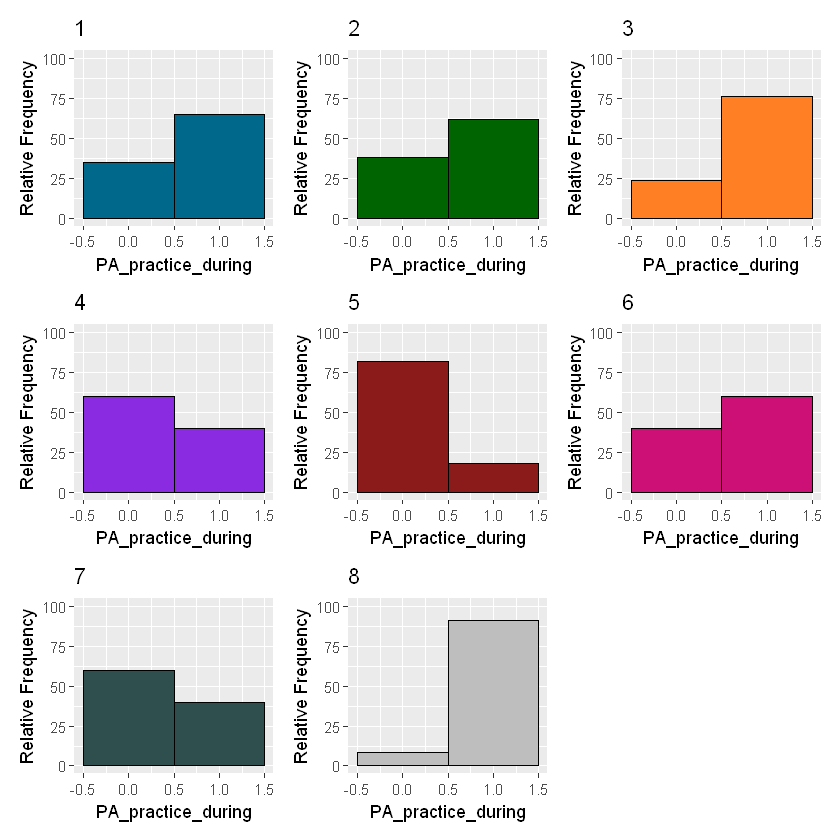

In [17]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_practice_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100)  
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Sedentary Behavior

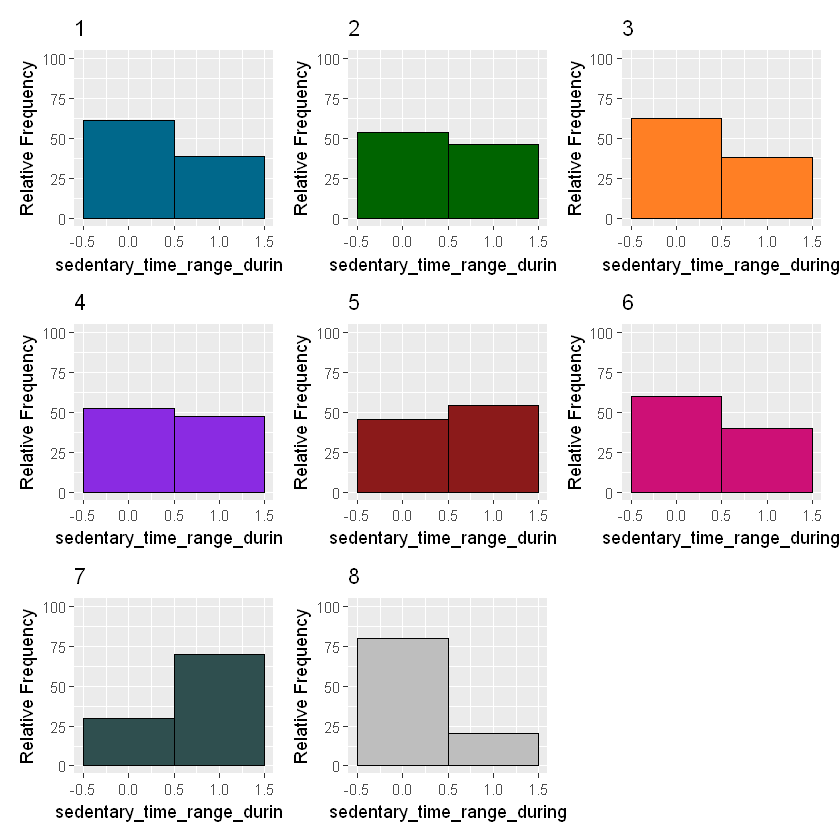

In [18]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sedentary_time_range_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Exercise Intensity

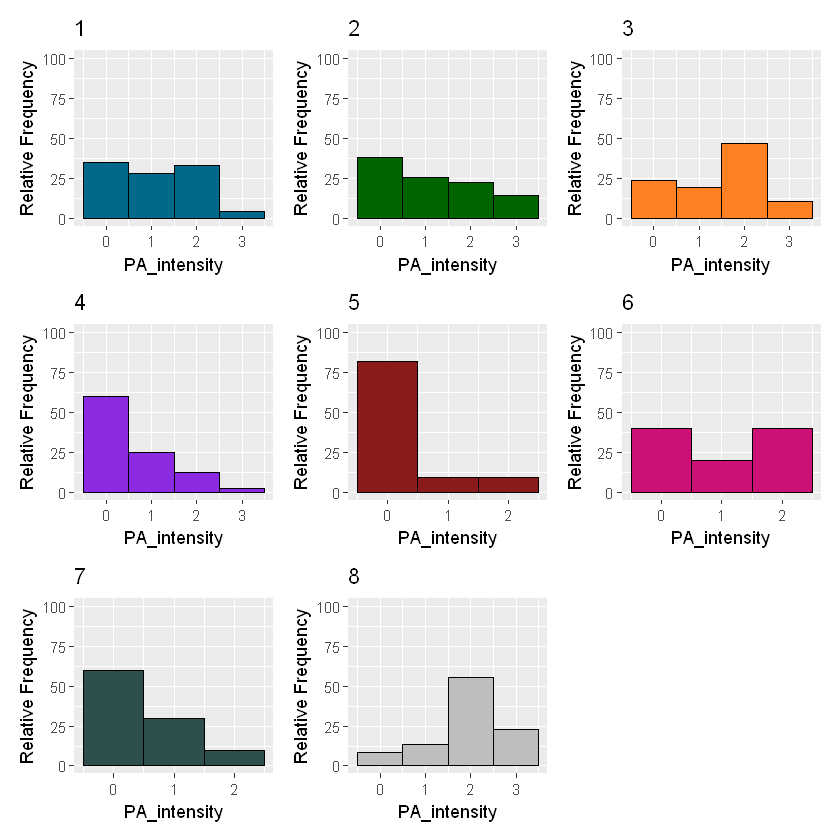

In [19]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_intensity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Duration

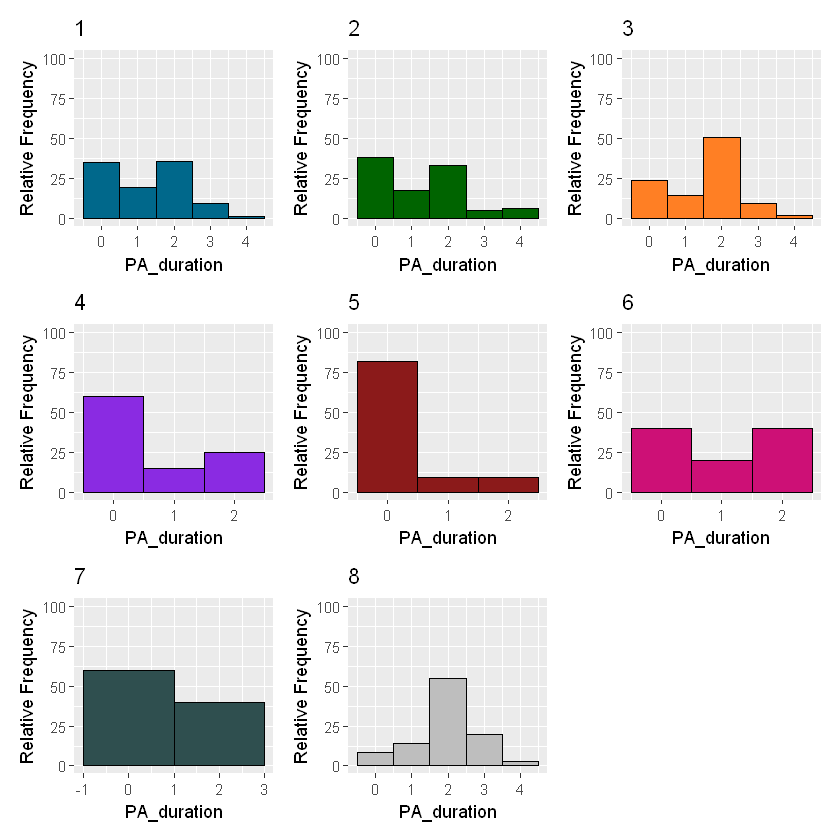

In [20]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_duration))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Weekly Frequency

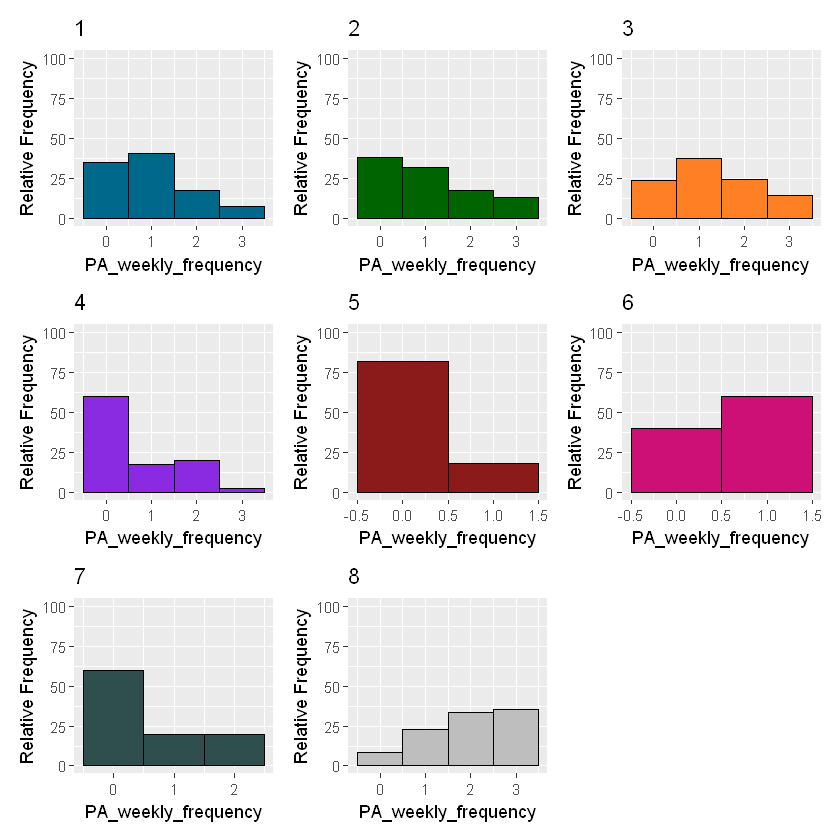

In [21]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_weekly_frequency))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Income Range

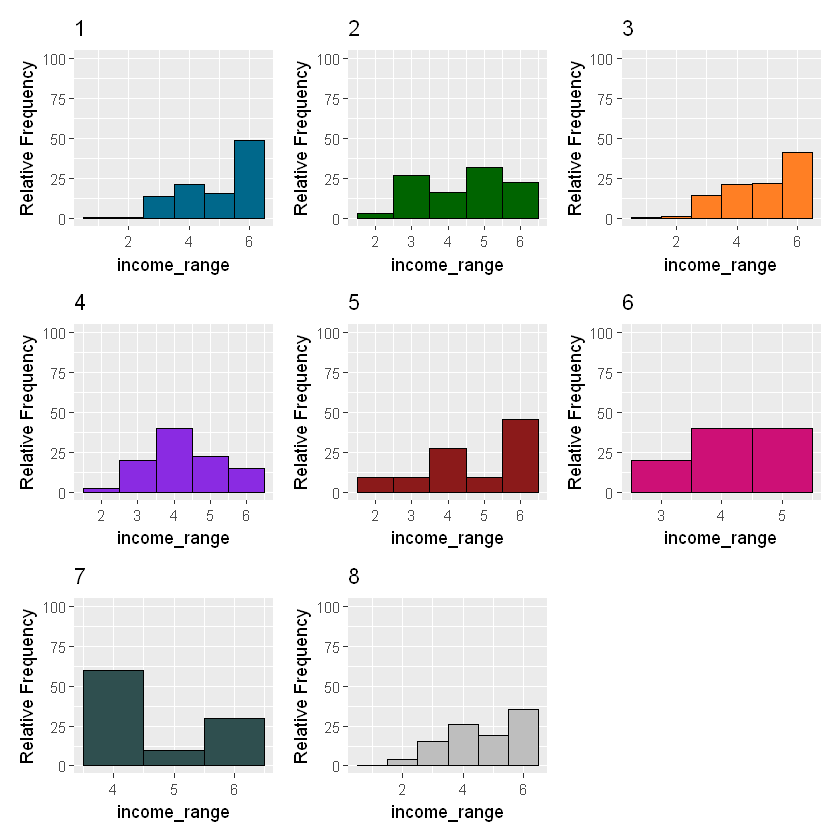

In [22]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$income_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Age Range

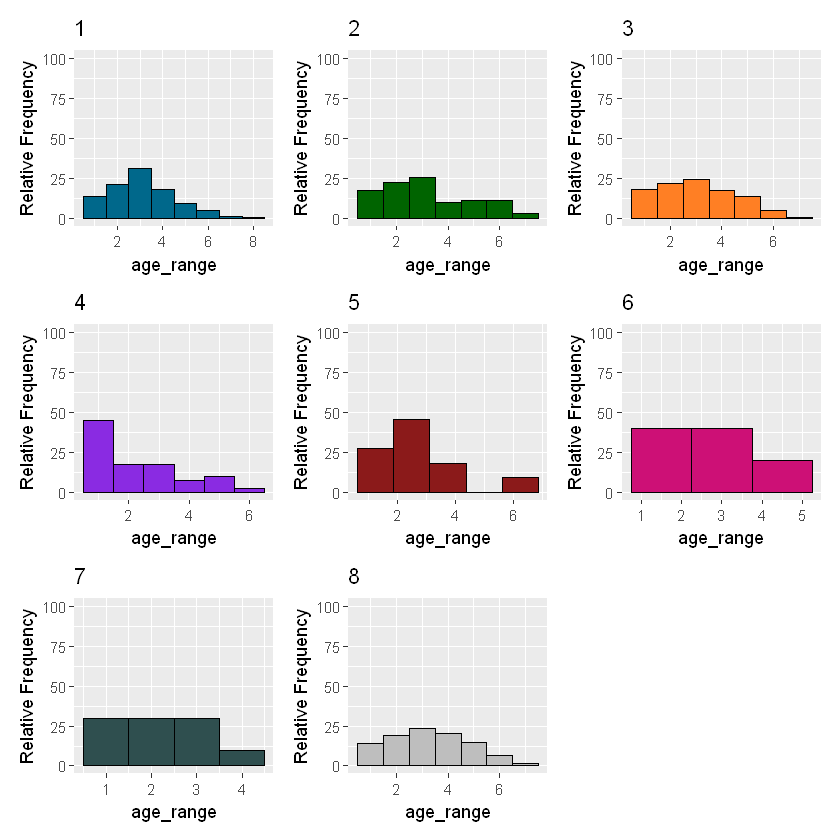

In [23]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$age_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Sex

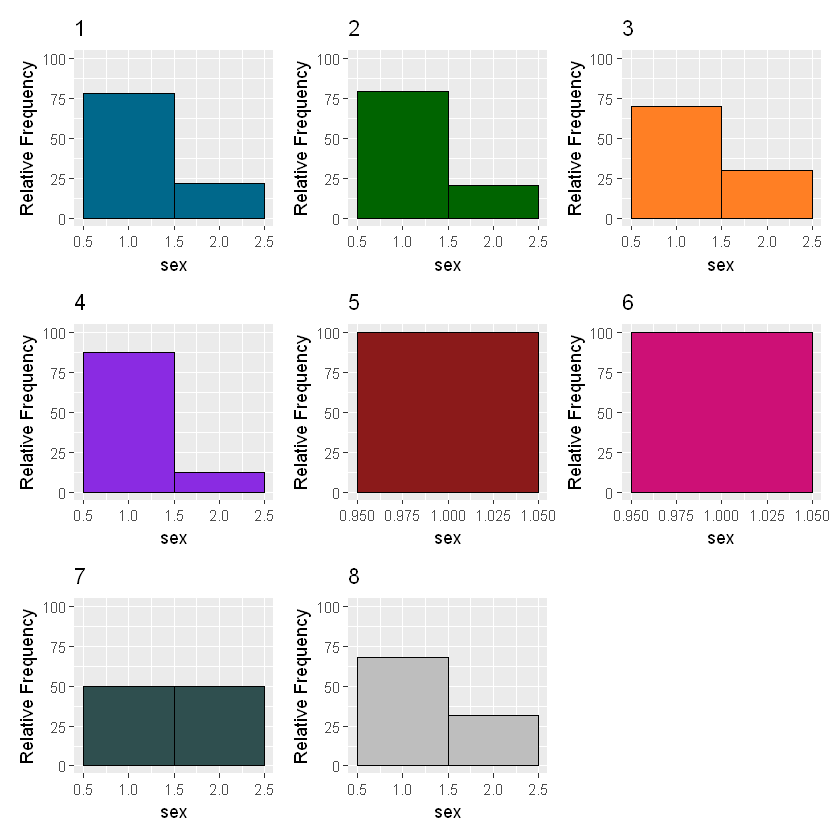

In [24]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sex))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Scholarity

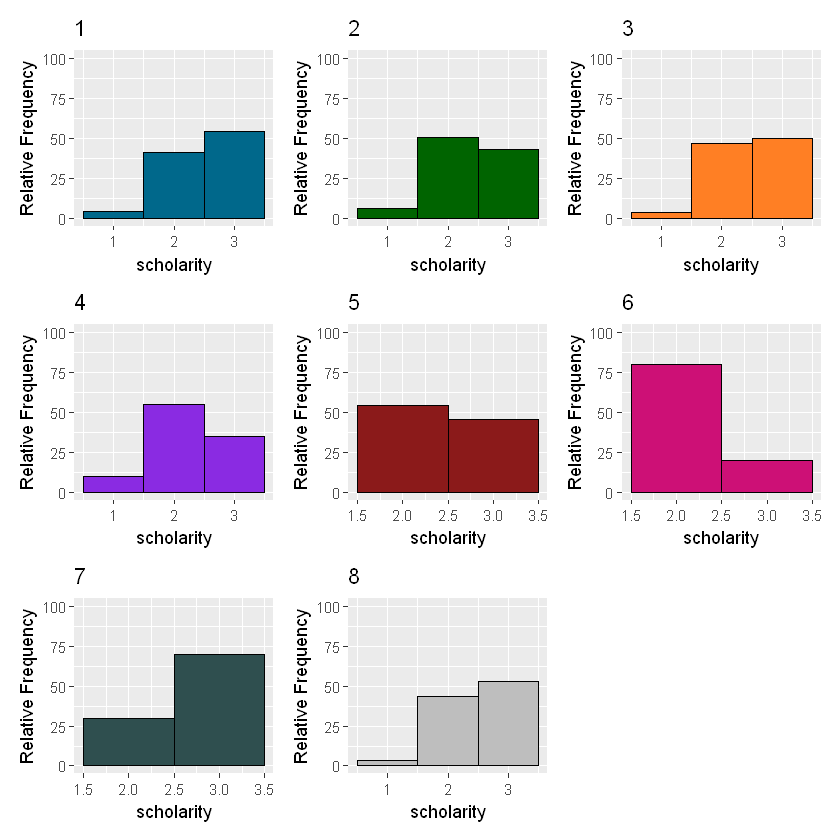

In [25]:


myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
for(cl in 1:best_K_kmodes){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$scholarity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)

#### All charts

In [26]:
# df_during[, -c(ncol(df_during))] <- lapply(df_during[, -c(ncol(df_during))], as.factor)
# lapply(df_during, levels)[c("volleyball", "basketball")]
# df_during <- subset(df_during, select = -c(volleyball, basketball))

In [27]:
# dummy <- dummyVars(" ~ .", data=df_during)
# df_during_encoded <- data.frame(predict(dummy, newdata = df_during)) 

In [28]:
# df_spider <- df_during_encoded %>% group_by(cluster) %>% summarise(
#                                     practice = sum(PA_practice_during.1),
#                                     sedentary = sum(sedentary_time_range_during.1),
#                                     intesity1 = sum(PA_intensity.1),
#                                     intesity2 = sum(PA_intensity.2),
#                                     intesity3 = sum(PA_intensity.3),
#                                     duration1 = sum(PA_duration.1),
#                                     duration2 = sum(PA_duration.2),
#                                     duration3 = sum(PA_duration.3),
#                                     duration4 = sum(PA_duration.4),
#                                     frequency1 = sum(PA_weekly_frequency.1),
#                                     frequency2 = sum(PA_weekly_frequency.2),
#                                     frequency3 = sum(PA_weekly_frequency.3)
#                                 )
# df_spider <- df_spider[, -c(1)]
# df_spider

In [29]:
# max_min <- data.frame(
#     practice = c(300, 0),
#     sedentary = c(300, 0),
#     intesity1 = c(300, 0),
#     intesity2 = c(300, 0),
#     intesity3 = c(300, 0),
#     duration1 = c(300, 0),
#     duration2 = c(300, 0),
#     duration3 = c(300, 0),
#     duration4 = c(300, 0),
#     frequency1 = c(300, 0),
#     frequency2 = c(300, 0),
#     frequency3 = c(300, 0)
# )
# rownames(max_min) <- c("Max", "Min")
# df_spider <- rbind(max_min, df_spider)
# df_spider

In [30]:
# create_beautiful_radarchart <- function(data, color = "#00AFBB", 
#                                         vlabels = colnames(data), vlcex = 0.7,
#                                         caxislabels = NULL, title = NULL, ...){
#   radarchart(
#     data, axistype = 1,
#     # Customize the polygon
#     pcol = color, pfcol = scales::alpha(color, 0.5), plwd = 2, plty = 1,
#     # Customize the grid
#     cglcol = "grey", cglty = 1, cglwd = 0.8,
#     # Customize the axis
#     axislabcol = "grey", 
#     # Variable labels
#     vlcex = vlcex, vlabels = vlabels,
#     caxislabels = caxislabels, title = title, ...
#   )
# }

In [31]:
# df_spider <- df_spider[c("Max", "Min", 3, 6, 8, 5, 7,  1, 2, 4), ]
# df_spider

In [32]:

# colors <-  c("#00AFBB", "#E7B800", "#FC4E07", '#a432a8')
# titles <- c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8")
# op <- par(mar = c(1, 3, 3, 3))


# create_beautiful_radarchart(
#   data = df_spider, 
#   caxislabels = c(0, 10, 20, 30),
#   color = colors,

# )


# legend(
#   x = "bottom", legend = rownames(df_spider[-c(1,2),]), horiz = TRUE,
#   bty = "n", pch = 20 , col =colors,
#   text.col = "black", cex = 1, pt.cex = 1.5
# )
# par(op)